# CHURN PREDICTION

In [1]:
# IMPORTING THE LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
# IMPORTING THE DATASET

df=pd.read_csv("/content/Churn_Modelling.csv", index_col='RowNumber')
df.drop(['CustomerId','Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 11)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


In [6]:
df.describe(include='O')

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [7]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# DATA PREROCESSING

In [8]:
# TRANSFORMING CATEGORICAL COLUMNS INTO NUMERIC

df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
2,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
3,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
4,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
5,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


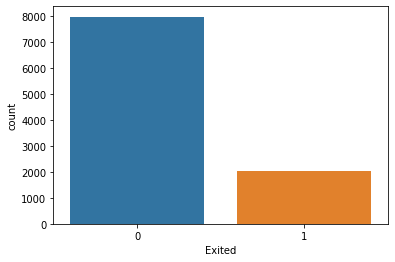

In [9]:
sns.countplot(x=df['Exited'])
plt.show()

In [10]:
# DATA IS HIGHLY IMBALANCED SO TAKING CARE OF IT 

from imblearn.over_sampling import SMOTE
x_new, y_new = SMOTE().fit_resample(df.drop('Exited', axis=1), df['Exited'])
x_new.shape, y_new.shape

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


((15926, 11), (15926,))

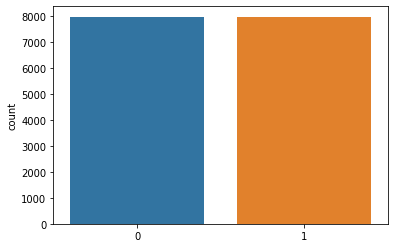

In [11]:
sns.countplot(x=y_new)

In [12]:
# SPLITTING THE DATA INTO TRAIN ANS TEST SET

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.25, random_state=42)
len(x_train), len(x_test)

(11944, 3982)

In [13]:
# FEATURE SCALING

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# BUILDING THE MODEL

In [14]:

# INITIALISING THE ANN
model = tf.keras.models.Sequential([
                                    
                                    # FIRST HIDDEN LAYER
                                    tf.keras.layers.Dense(units=10, activation='relu', input_shape=(11,)),
                                    
                                    # SECOND HIDDEN LAYER
                                    tf.keras.layers.Dense(units=10, activation='relu'),
                                     
                                     # OUTPUT LAYER
                                    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [16]:
# OMPPILING THE MODEL

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
# TRAINING THE MODEL ON TRAIN SET AND EVALUATING ON TEST SET

model.fit(x_train, y_train, batch_size=32, epochs=110, validation_data=(x_test,y_test), verbose=1)

Epoch 1/110
374/374 [==============================] - 2s 3ms/step - loss: 0.6721 - accuracy: 0.5683 - val_loss: 0.6064 - val_accuracy: 0.6836
Epoch 2/110
374/374 [==============================] - 1s 2ms/step - loss: 0.5827 - accuracy: 0.7043 - val_loss: 0.5680 - val_accuracy: 0.7212
Epoch 3/110
374/374 [==============================] - 1s 2ms/step - loss: 0.5593 - accuracy: 0.7217 - val_loss: 0.5472 - val_accuracy: 0.7413
Epoch 4/110
374/374 [==============================] - 1s 2ms/step - loss: 0.5370 - accuracy: 0.7383 - val_loss: 0.5275 - val_accuracy: 0.7526
Epoch 5/110
374/374 [==============================] - 1s 2ms/step - loss: 0.5132 - accuracy: 0.7516 - val_loss: 0.5091 - val_accuracy: 0.7534
Epoch 6/110
374/374 [==============================] - 1s 2ms/step - loss: 0.4910 - accuracy: 0.7607 - val_loss: 0.4956 - val_accuracy: 0.7609
Epoch 7/110
374/374 [==============================] - 1s 2ms/step - loss: 0.4807 - accuracy: 0.7725 - val_loss: 0.4850 - val_accuracy: 0.7672

In [18]:
# MAKING PREDICTION

y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

0.8756906077348067
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      2036
           1       0.94      0.80      0.86      1946

    accuracy                           0.88      3982
   macro avg       0.88      0.87      0.87      3982
weighted avg       0.88      0.88      0.87      3982



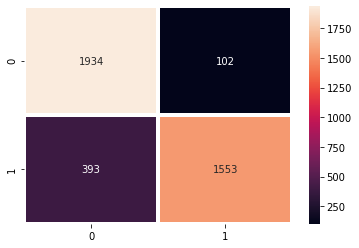

In [19]:
# PLOTTING CONFUSION MATRIX

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, lw=3, fmt='d')
plt.show()